# sympy で伝達関数を作って、ボード線図　過渡応答を見る
- [Control](https://docs.sympy.org/latest/modules/physics/control/control.html)
- [Control API](https://docs.sympy.org/latest/modules/physics/control/lti.html)
- [Control System Plots](https://docs.sympy.org/latest/modules/physics/control/control_plots.html)

In [47]:
import sympy
t=Symbol('t', real=True)
s=Symbol('s', real=True, positive=True)
c=Symbol('c', real=True, positive=True)
r=Symbol('r', real=True, positive=True)
omega=Symbol('omega', real=True, positive=True)

In [4]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [5]:
F=1/(1+s*c*r)

In [6]:
F

1/(c*r*s + 1)

In [7]:
f=invL(F)

In [8]:
f

exp(-t/(c*r))*Heaviside(t)/(c*r)

# sympy の　Control API TransferFunction を使ってみる

lti  
クラス 'sympy.physics.control.lti。TransferFunction ( num、 den、 var )'[ソース]
ラプラス変換複素変数の多項式の比によって厳密に記述できる LTI (線形、時間不変) システムを表すためのクラス。引数はnum、den、および ですvar。ここで、numおよび はdenそれぞれ の分子多項式と分母多項式でありTransferFunction、3 番目の引数は伝達関数のこれらの多項式で使用されるラプラス変換の複素変数です。 numおよび はden多項式または数値のいずれかにすることができますが、 でなければvar なりませんSymbol。

パラメータ:
num : Expr、数値

伝達関数の分子多項式。

den : Expr、数値

伝達関数の分母多項式。

var : シンボル

伝達関数の多項式で使用されるラプラス変換の複素変数。

In [9]:
from sympy.abc import s, p, a
from sympy.physics.control.lti import TransferFunction
tf1 = TransferFunction(s + a, s**2 + s + 1, s)
tf1

TransferFunction(a + s, s**2 + s + 1, s)

In [10]:
-tf1

TransferFunction(-a - s, s**2 + s + 1, s)

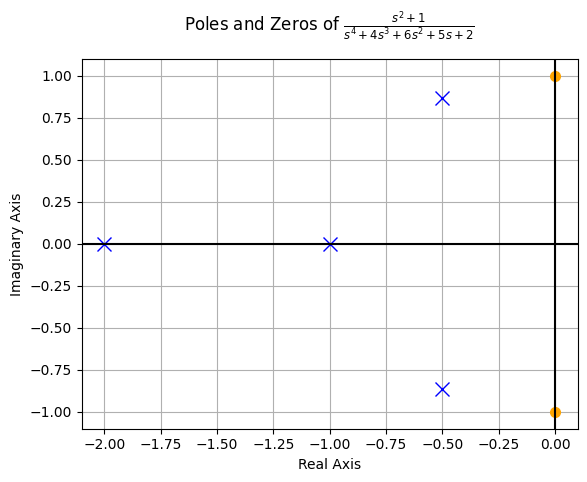

In [12]:
from sympy.physics.control.control_plots import pole_zero_plot
tf1 = TransferFunction(s**2 + 1, s**4 + 4*s**3 + 6*s**2 + 5*s + 2, s)
pole_zero_plot(tf1)  

# RC フィルタのボード線図を書いてみる
[Sympy.physics.control.control_plots](https://docs.sympy.org/latest/modules/physics/control/control_plots.html)


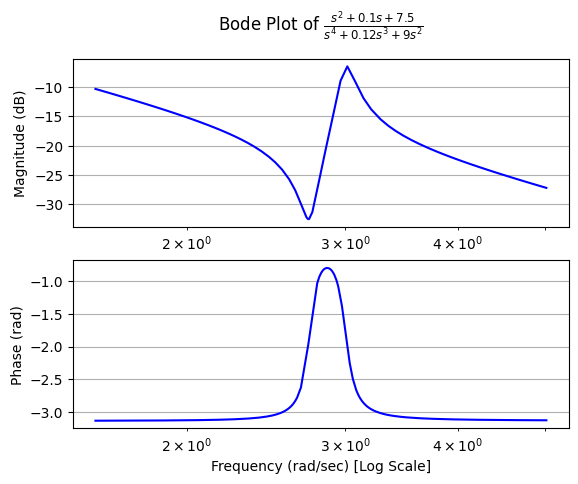

In [15]:
# Example 
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_plot
tf1 = TransferFunction(1*s**2 + 0.1*s + 7.5, 1*s**4 + 0.12*s**3 + 9*s**2, s)
bode_plot(tf1, initial_exp=0.2, final_exp=0.7)   

$ Vin=R+\frac{1}{sC} $  
$ Vout=\frac{1}{sC} $  
$ \frac{Vout}{Vin}= \frac{\frac{1}{sC}}{R+\frac{1}{sC}}=\frac{1}{1+sCR} $

In [18]:
tf2=TransferFunction(1/(s*c),r+1/(s*c),s)

In [19]:
tf2

TransferFunction(1/(c*s), r + 1/(c*s), s)

In [23]:
tf2.simplify()

TransferFunction(1, c*r*s + 1, s)

In [30]:
tf3=tf2.subs([(c,1e-6),(r,100)])

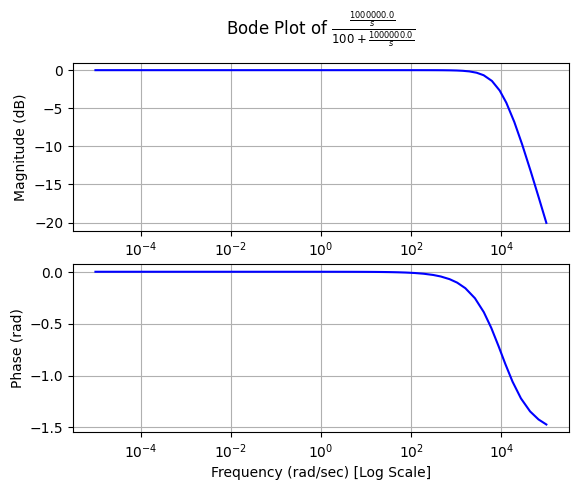

In [31]:
bode_plot(tf3)   

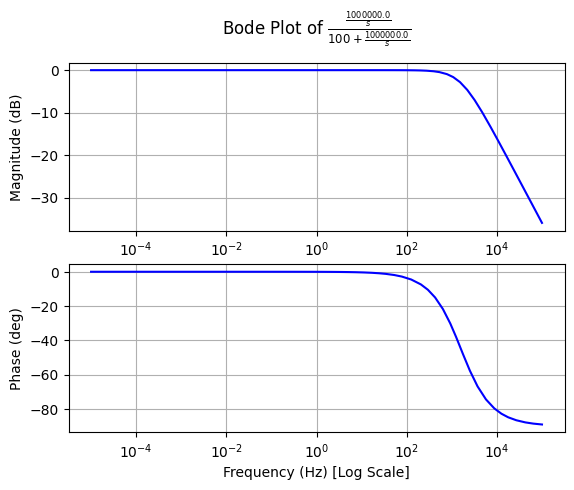

In [32]:
bode_plot(tf3,freq_unit='Hz',phase_unit='deg')   

# impulse 応答

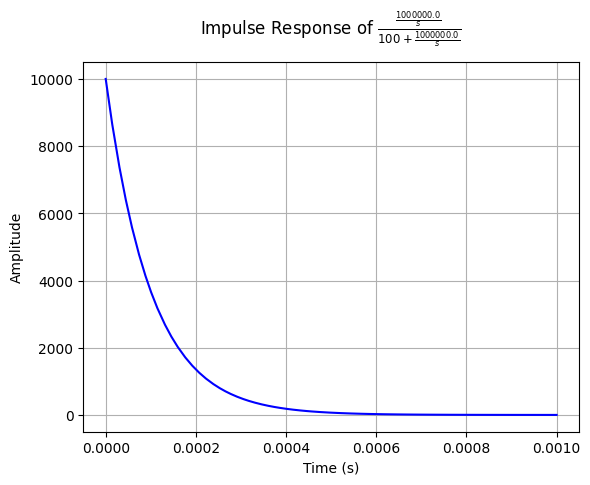

In [42]:
from sympy.physics.control.control_plots import impulse_response_plot
impulse_response_plot(tf3,upper_limit=1e-3)   

# Step 応答

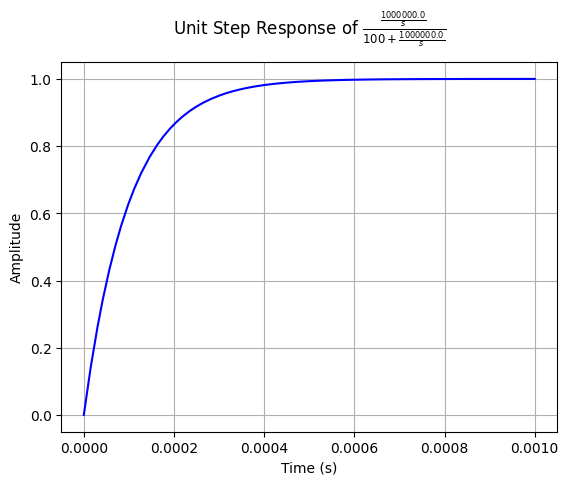

In [46]:
from sympy.physics.control.control_plots import step_response_plot
step_response_plot(tf3,upper_limit=1e-3) 